# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [4]:
# Importer resten av pakkene du trenger her:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [5]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

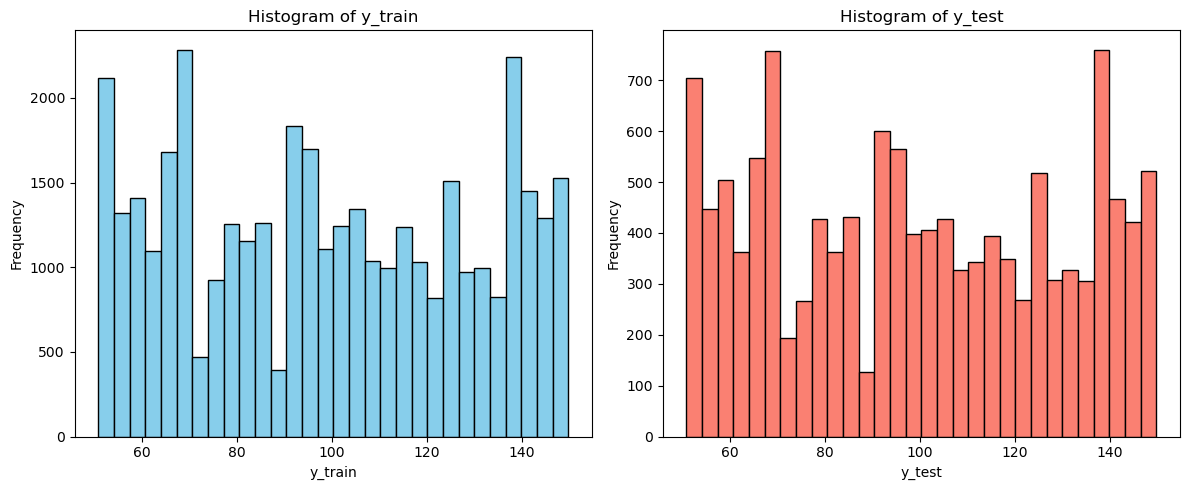

In [9]:
# Additional code to plot histograms for y_train and y_test
plt.figure(figsize=(12, 5))

# Histogram for y_train
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of y_train")
plt.xlabel("y_train")
plt.ylabel("Frequency")

# Histogram for y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, color='salmon', edgecolor='black')
plt.title("Histogram of y_test")
plt.xlabel("y_test")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Svar:**

*Histogrammene viser en kontinuerlig fordelig av verdier i begge settene. Dette tyder på at det er numerisk og ikke kategorisk.
Dette tyder da på at problemet som skal løses er et regresjonsproblem og ikke et klassifiseringsproblem.*

#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

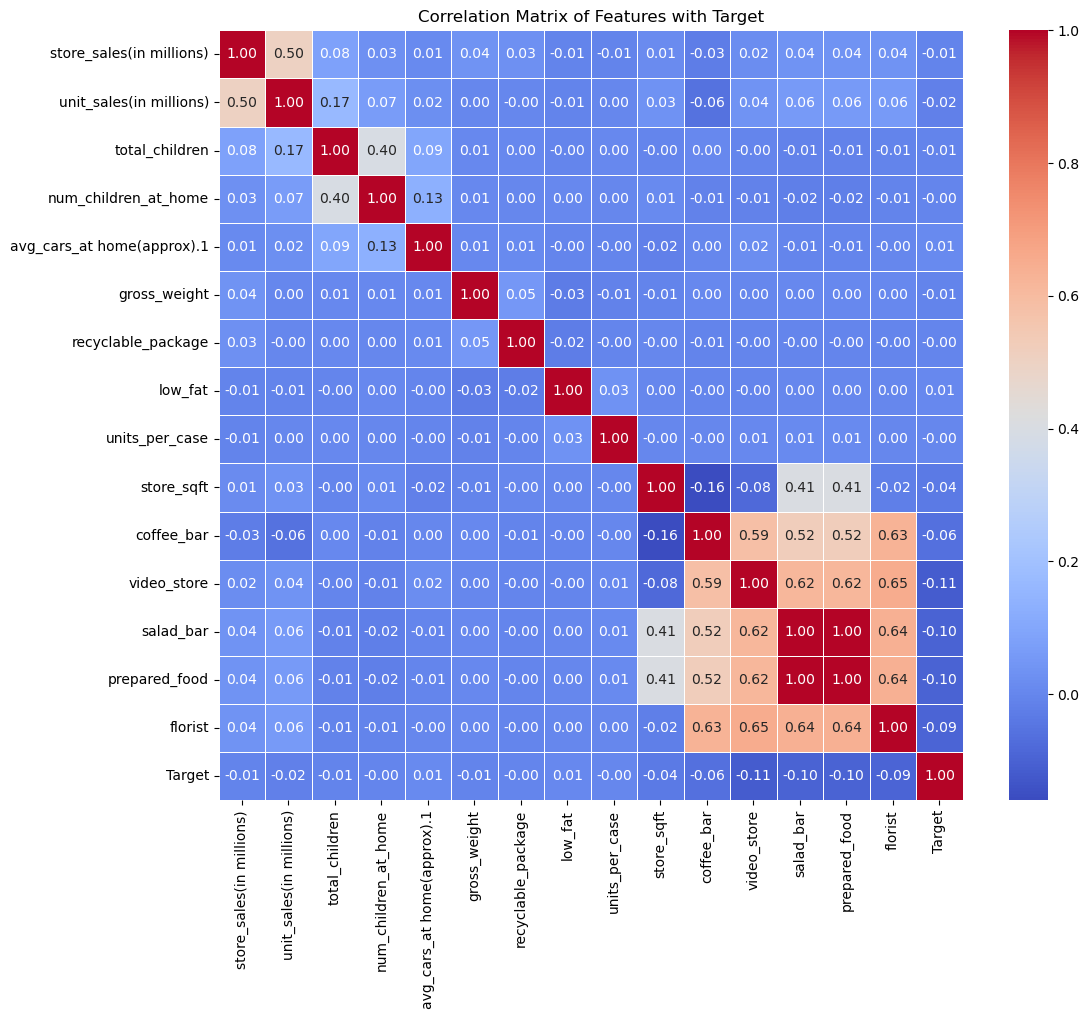

In [13]:
# Define the function to create and plot the correlation matrix
def korrelasjonsmatrise(X, y):
    # Combine X and y into a single DataFrame
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp

    # Calculate the correlation matrix
    corr_matrix = X_temp.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Features with Target")
    plt.show()

# Call the function with the training data
korrelasjonsmatrise(X_train, y_train)

**Svar:**

* De mest korrelerte variablene med Target er prepared_food, video_store, salad_bar og florist.
   Disse er relativt svake og har nok liten påvirkning på target.*

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = DecisionTreeRegressor(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the corresponding score
print("Best parameters:", best_params)
print("Best cross-validation score (neg_mean_squared_error):", best_score)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score (neg_mean_squared_error): -855.874456129783


**Svar:**

*Den beste hyperparameterkombinasjonen gir en "neg_mean_squared_error" på -855,87. Dette betyr at modellen har en viss grad av feil i sine prediksjoner. Selv om resultatet ikke er perfekt, er det det beste akternativet med denne optimaliseringen*

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import numpy as np

# Define the model with the best parameters
best_model = RandomForestRegressor(
    max_depth=10,
    min_samples_split=10,
    n_estimators=150,
    random_state=0
)

# Define custom scoring functions for MAE and MSE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Lists to store MAE and MSE for each fold
mae_scores = []
mse_scores = []

# Cross-validation loop to log values for each fold
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit the model on the current training fold
    best_model.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_val_pred = best_model.predict(X_val_fold)
    
    # Calculate MAE and MSE for the current fold
    fold_mae = mean_absolute_error(y_val_fold, y_val_pred)
    fold_mse = mean_squared_error(y_val_fold, y_val_pred)
    
    # Store scores for this fold
    mae_scores.append(fold_mae)
    mse_scores.append(fold_mse)
    
    # Log the scores for the current fold
    print(f"Fold MAE: {fold_mae}")
    print(f"Fold MSE: {fold_mse}")

# Calculate average and standard deviation for each metric
mae_mean = np.mean(mae_scores)
mae_std = np.std(mae_scores)
mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)

print("\nOverall Cross-Validation Results:")
print("Mean Absolute Error (MAE) - Mean:", mae_mean, "Std Dev:", mae_std)
print("Mean Squared Error (MSE) - Mean:", mse_mean, "Std Dev:", mse_std)

# Calculate percentage errors based on the mean target value
average_target = np.mean(y_train)
mae_percentage_error = (mae_mean / average_target) * 100
mse_percentage_error = (mse_mean / average_target) * 100

print(f"\nMean Absolute Error as percentage of target: {mae_percentage_error:.2f}%")
print(f"Mean Squared Error as percentage of target: {mse_percentage_error:.2f}%")


Fold MAE: 25.115606925979804
Fold MSE: 847.4114634852598
Fold MAE: 25.070867186647575
Fold MSE: 845.4649243031822
Fold MAE: 24.97170183991045
Fold MSE: 847.9458318078205
Fold MAE: 25.117872047298356
Fold MSE: 852.6053161784807
Fold MAE: 25.120051601543995
Fold MSE: 851.8058377996371

Overall Cross-Validation Results:
Mean Absolute Error (MAE) - Mean: 25.079219920276035 Std Dev: 0.05677170609938163
Mean Squared Error (MSE) - Mean: 849.0466747148761 Std Dev: 2.7199859145937157

Mean Absolute Error as percentage of target: 25.25%
Mean Squared Error as percentage of target: 854.72%


**Svar:**

*Resultatene fra kryssvalideringen viser at det er store feilmarginer for mean absolute error og mean squared error. Dette viser at modellen kan forbedres mye for å få bedre presisjon.*

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train the model on the entire training set using the best parameters
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE) on the test set
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Test Mean Absolute Error (MAE):", test_mae)
print("Test Mean Squared Error (MSE):", test_mse)


Test Mean Absolute Error (MAE): 25.103682814237153
Test Mean Squared Error (MSE): 847.4562039223905


**Svar:**

*Resultatene ovenfor viser marginale forbedringer på feilmarginen.*